1. Проверьте работу модели с разными начальными значениями параметров. Убедитесь, что модель всегда сходится к оптимуму.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt  # You can use X.describe() if X is a DataFrame

In [2]:
x = pd.read_csv('https://raw.githubusercontent.com/koroteevmv/ML_course/2023/ML1.1%20linear%20regression/data/x.csv', index_col=0)['0']
y = pd.read_csv('https://raw.githubusercontent.com/koroteevmv/ML_course/2023/ML1.1%20linear%20regression/data/y.csv', index_col=0)['0']

In [ ]:
class Model(object):
    """Модель парной линейной регрессии"""
    def __init__(self):
        self.b0 = 1
        self.b1 = 1
    def predict(self, X):
        return self.b0 + self.b1 * X
    def error(self, X, Y):
        return sum(((self.predict(X) - Y)**2) / (2 * len(X)))
    def fit(self, X, Y, alpha=0.001, accuracy=0.01, max_steps=5000):
        steps, errors = [], []
        step = 0
        for _ in range(10000):
            dJ0 = sum(self.predict(X) - Y) /len(X)
            dJ1 = sum((self.predict(X) - Y) * X) /len(X)
            self.b0 -= alpha * dJ0
            self.b1 -= alpha * dJ1
            new_err = hyp.error(X, Y)
            step += 1
            steps.append(step)
            errors.append(new_err)
        return steps, errors

In [ ]:
hyp = Model()
steps, errors = hyp.fit(x, y)
J = hyp.error(x, y)
print("error after gradient descent:", J)

error after gradient descent: 2.5297934237939247e-06


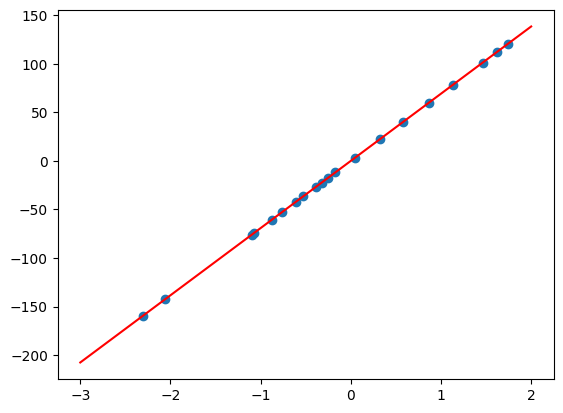

In [ ]:
X0 = np.linspace(-3, 2, 100)
Y0 = hyp.predict(X0)
plt.figure()
plt.scatter(x, y)
plt.plot(X0, Y0, 'r')
plt.show()

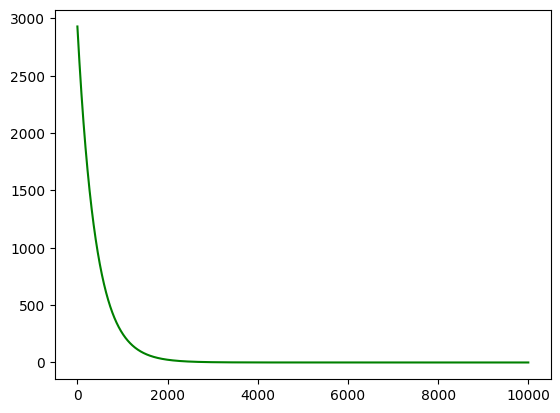

In [ ]:
plt.figure()
plt.plot(steps, errors, 'g')
plt.show()

2. Проверьте работу модели с другими значениями скорости обучения. Найдите значение, при котором градиентный спуск расходится.



Неправильный выбор скорости обучения (learning rate): Скорость обучения определяет размер шага, который мы делаем при обновлении параметров модели. Если скорость обучения выбрана слишком большой, алгоритм может пропускать оптимальное решение и просто расходиться. Но если скорость обучения выбрана слишком маленькой, алгоритм может сходиться слишком медленно или застрять в локальном минимуме. Поэтому важно подобрать оптимальное значение скорости обучения, которое обеспечит быстрое сходимость градиентного спуска.

error after gradient descent: nan


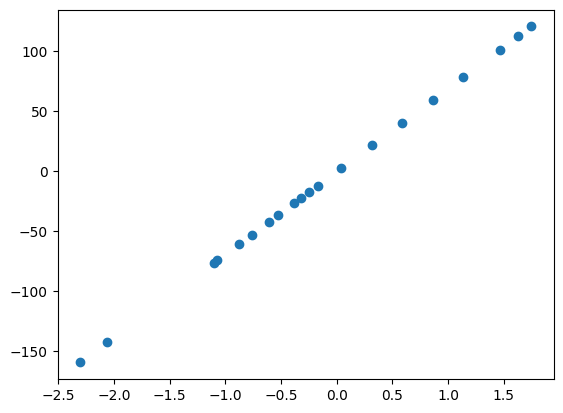

In [ ]:
class Model(object):
    """Модель парной линейной регрессии"""
    def __init__(self):
        self.b0 = 1
        self.b1 = 1
    def predict(self, X):
        return self.b0 + self.b1 * X
    def error(self, X, Y):
        return sum(((self.predict(X) - Y)**2) / (2 * len(X)))
    def fit(self, X, Y):
        alpha=10
        steps, errors = [], []
        step = 0
        for _ in range(1000):
            dJ0 = sum(self.predict(X) - Y) /len(X)
            dJ1 = sum((self.predict(X) - Y) * X) /len(X)
            self.b0 -= alpha * dJ0
            self.b1 -= alpha * dJ1
            new_err = hyp.error(X, Y)
            step += 1
            steps.append(step)
            errors.append(new_err)
        return steps, errors

hyp = Model()
steps, errors = hyp.fit(x, y)
J = hyp.error(x, y)
print("error after gradient descent:", J)

X0 = np.linspace(-3, 2, 100)
Y0 = hyp.predict(X0)
plt.figure()
plt.scatter(x, y)
plt.plot(X0, Y0, 'r')
plt.show()

3. Модифицируйте код модели таким образом, чтобы он корректно работал как с Series, так и с DataFrame. При этом, конечно, датафрейм не должен содержать "лишних" столбцов.

In [3]:
df = pd.DataFrame()
len(df.columns)

0

error after gradient descent: 0.003876683616811537
****************************************************************************************************
error after gradient descent: 0.003876683616811537


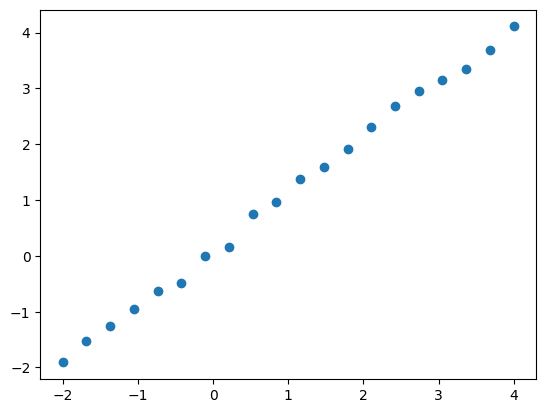

In [4]:
class Model(object):
    """Модель парной линейной регрессии"""
    def __init__(self, b0=0, b1=0):
        self.b0 = b0
        self.b1 = b1
    def predict(self, X = np.zeros(10), df = pd.DataFrame()):
        X = X
        if len(df.columns) == 2:
          X = df.iloc[:,0]
        return self.b0 + self.b1 * X
    def error(self, X = np.zeros(10), Y = np.zeros(10), df = pd.DataFrame()):
        X = X
        Y = Y
        if len(df.columns) == 2:
          X = df.iloc[:,0]
          Y = df.iloc[:,1]
        return sum(((self.predict(X) - Y)**2) / (2 * len(X)))
    def fit(self, X = np.zeros(10), Y = np.zeros(10), df = pd.DataFrame(), alpha=0.001, accuracy=0.01, max_steps=5000):
        X = X
        Y = Y
        if len(df.columns) == 2:
          X = df.iloc[:,0]
          Y = df.iloc[:,1]
        steps, errors = [], []
        step = 0
        for _ in range(10000):
            dJ0 = sum(self.predict(X) - Y) /len(X)
            dJ1 = sum((self.predict(X) - Y) * X) /len(X)
            self.b0 -= alpha * dJ0
            self.b1 -= alpha * dJ1
            new_err = self.error(X, Y)
            step += 1
            steps.append(step)
            errors.append(new_err)
        return steps, errors


b = 0.1
df = pd.DataFrame({'x': np.linspace(-2,4,20), 'y': np.linspace(-2,4,20) + b + np.random.normal(0,0.1,20)})
hyp = Model()
steps1, errors1 = hyp.fit(df=df)
J1 = hyp.error(df = df)
print("error after gradient descent:", J1)
print("*"*100)
hyp2 = Model()
steps2, errors2 = hyp2.fit(df.iloc[:,0], df.iloc[:,1])
J2 = hyp.error(df.iloc[:,0], df.iloc[:,1])
print("error after gradient descent:", J2)

plt.scatter(df.x, df.y)

4. Модифицируйте алгоритм градиентного спука таким образом, чтобы он останавливаля, если ошибка перестает снижаться. Для этого сравнивайте, на сколько понизилась ошибка на каждом шаге и если это снижение меньше некоторой заранее заданной очень маленькой величины - выходите из цикла. Эту величину можно взять одну миллионную, например.

In [19]:
class Model(object):
    """Модель парной линейной регрессии"""
    def __init__(self, b0=0, b1=0):
        self.b0 = b0
        self.b1 = b1
    def predict(self, X = np.zeros(10), df = pd.DataFrame()):
        X = X
        if len(df.columns) == 2:
          X = df.iloc[:,0]
        return self.b0 + self.b1 * X
    def error(self, X = np.zeros(10), Y = np.zeros(10), df = pd.DataFrame()):
        X = X
        Y = Y
        if len(df.columns) == 2:
          X = df.iloc[:,0]
          Y = df.iloc[:,1]
        return sum(((self.predict(X) - Y)**2) / (2 * len(X)))
    def fit(self, X = np.zeros(10), Y = np.zeros(10), df = pd.DataFrame(), alpha=0.001, accuracy=0.000001, max_steps=5000):
        X = X
        Y = Y
        if len(df.columns) == 2:
          X = df.iloc[:,0]
          Y = df.iloc[:,1]
        steps, errors = [], []
        step = 0
        for _ in range(max_steps):
            dJ0 = sum(self.predict(X) - Y) /len(X)
            dJ1 = sum((self.predict(X) - Y) * X) /len(X)
            self.b0 -= alpha * dJ0
            self.b1 -= alpha * dJ1
            new_err = self.error(X, Y)
            step += 1
            if len(errors) > 1:
              delta = new_err - errors[-1]
              if (delta < 0 and abs(delta) < 0):
                break
            steps.append(step)
            errors.append(new_err)
        return steps, errors

b = 0.1
df = pd.DataFrame({'x': np.linspace(-2,4,20), 'y': np.linspace(-2,4,20) + b + np.random.normal(0,0.1,20)})
hyp1 = Model()
steps1, errors1 = hyp1.fit(df=df, accuracy = 0.000000001)
J1 = hyp1.error(df = df)
print("error after gradient descent:", J1)
print("Обучение остановлено на итерации: ", len(steps1))
print("*"*100)
hyp2 = Model()
steps2, errors2 = hyp2.fit(df.iloc[:,0], df.iloc[:,1], accuracy = 0.000001)
J2 = hyp2.error(df.iloc[:,0], df.iloc[:,1])
print("error after gradient descent:", J2)
print("Обучение остановлено на итерации: ", len(steps2))

error after gradient descent: 0.005087634663826121
Обучение остановлено на итерации:  5000
****************************************************************************************************
error after gradient descent: 0.005087634663826121
Обучение остановлено на итерации:  5000


5. Убедитесь, что алгоритм градиентного спуска завершается всегда - либо если ошибка перестает существенно меняться, либо при достижении максимального количества шагов.

In [18]:
class Model(object):
    """Модель парной линейной регрессии"""
    def __init__(self, b0=0, b1=0):
        self.b0 = b0
        self.b1 = b1
    def predict(self, X = np.zeros(10), df = pd.DataFrame()):
        X = X
        if len(df.columns) == 2:
          X = df.iloc[:,0]
        return self.b0 + self.b1 * X
    def error(self, X = np.zeros(10), Y = np.zeros(10), df = pd.DataFrame()):
        X = X
        Y = Y
        if len(df.columns) == 2:
          X = df.iloc[:,0]
          Y = df.iloc[:,1]
        return sum(((self.predict(X) - Y)**2) / (2 * len(X)))
    def fit(self, X = np.zeros(10), Y = np.zeros(10), df = pd.DataFrame(), alpha=0.001, accuracy=0.000001, max_steps=5000):
        X = X
        Y = Y
        if len(df.columns) == 2:
          X = df.iloc[:,0]
          Y = df.iloc[:,1]
        steps, errors = [], []
        step = 0
        for _ in range(max_steps):
            dJ0 = sum(self.predict(X) - Y) /len(X)
            dJ1 = sum((self.predict(X) - Y) * X) /len(X)
            self.b0 -= alpha * dJ0
            self.b1 -= alpha * dJ1
            new_err = self.error(X, Y)
            step += 1
            if len(errors) > 1:
              delta = new_err - errors[-1]
              if (delta < 0 and abs(delta) < 0):
                break
            steps.append(step)
            errors.append(new_err)
        return steps, errors


6. Реализуйте механизм адаптивной скорости обучения. Чтобы не задавать вручную параметр alpha можно отслеживать, увеличивается ли ошибка после первого шага градиентного спуска. В начале задаем скорость обучения близкой к 1. Если ошибка после одного шага увеличивается - скорость обучения надо уменьшить (например, в 2 раза). Если не увеличивается - скорость обучения можно не трогать. Еще подумайте, как после уменьшения скорости перезапускать градиентный спуск заново.

In [20]:
class Model(object):
    """Модель парной линейной регрессии"""
    def __init__(self, b0=0, b1=0):
        self.b0 = b0
        self.b1 = b1
    def predict(self, X = np.zeros(10), df = pd.DataFrame()):
        X = X
        if len(df.columns) == 2:
          X = df.iloc[:,0]
        return self.b0 + self.b1 * X
    def error(self, X = np.zeros(10), Y = np.zeros(10), df = pd.DataFrame()):
        X = X
        Y = Y
        if len(df.columns) == 2:
          X = df.iloc[:,0]
          Y = df.iloc[:,1]
        return sum(((self.predict(X) - Y)**2) / (2 * len(X)))
    def fit(self, X = np.zeros(10), Y = np.zeros(10), df = pd.DataFrame(), alpha=0.9, accuracy=0.000001, max_steps=5000):
        X = X
        Y = Y
        if len(df.columns) == 2:
          X = df.iloc[:,0]
          Y = df.iloc[:,1]
        steps, errors = [], []
        step = 0
        for _ in range(max_steps):
            dJ0 = sum(self.predict(X) - Y) /len(X)
            dJ1 = sum((self.predict(X) - Y) * X) /len(X)
            self.b0 -= alpha * dJ0
            self.b1 -= alpha * dJ1
            new_err = self.error(X, Y)
            step += 1
            if len(errors) > 1:
              delta = new_err - errors[-1]
              if delta > 0:
                alpha = 0.5*alpha


model3 = Model()
steps, errors = model3.fit(x, y)

X0 = np.linspace(-3, 5, 100)
Y0 = model3.predict(X0)

plt.figure()
plt.scatter(x, y)
plt.plot(X0, Y0, 'r')
plt.show()

TypeError: ignored

7. Добавьте к классу модели метод рисования графиков. Сделайте так, чтобы он был независим от масштаба переданных данных.

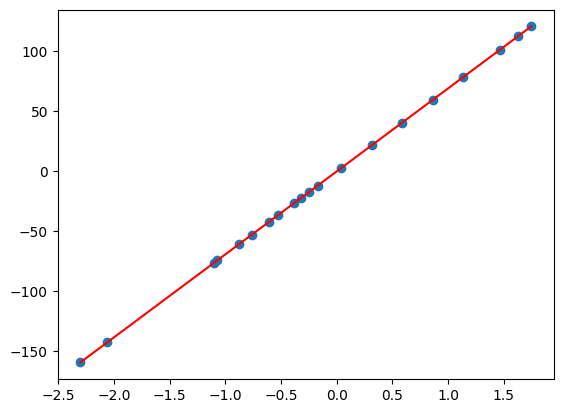

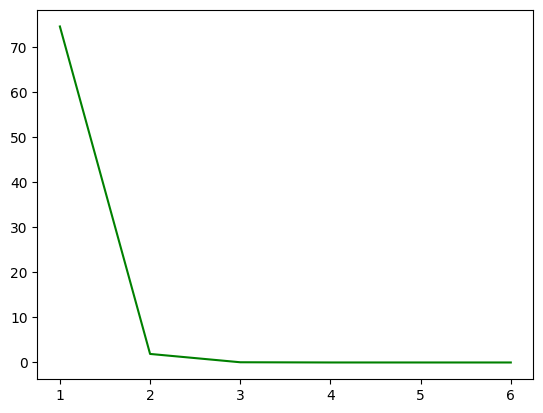

In [21]:
class Model(object):
    """Модель парной линейной регрессии"""
    def __init__(self):
        self.b0 = 0
        self.b1 = 0
        self.made_steps = []
        self.count_errors = []
    def predict(self, X):
        return self.b0 + self.b1 * X.squeeze()
    def error(self, X, Y):
        X = X.squeeze()
        Y = Y.squeeze()
        return sum(((self.predict(X) - Y)**2) / (2 * len(X)))
    def fit(self, X, Y, alpha=0.9, accuracy=0.01, max_steps=5000, error_step = 0.000001):
        steps, errors = [], []
        step = 0
        X = X.squeeze()
        Y = Y.squeeze()

        for _ in range(10000):
            dJ0 = sum(self.predict(X) - Y) /len(X)
            dJ1 = sum((self.predict(X) - Y) * X) /len(X)
            self.b0 -= alpha * dJ0
            self.b1 -= alpha * dJ1
            new_err = self.error(X, Y)

            if errors:
              if errors[-1] - new_err < 0:
                alpha = 2*alpha
              elif abs(errors[-1] - new_err) <= error_step:
                self.made_steps = steps
                self.count_errors = errors
                return steps, errors
            if step >= max_steps:
              self.made_steps = steps
              self.count_errors = errors
              return steps, errors

            step += 1
            steps.append(step)
            errors.append(new_err)
        self.made_steps = steps
        self.count_errors = errors
        return steps, errors
    def plot_error(self, X, Y):
      X = X.squeeze()
      Y = Y.squeeze()
      X0 = np.linspace(min(X), max(X), 100)
      Y0 = self.predict(X0)
      plt.figure()
      plt.plot(self.made_steps, self.count_errors, 'g')
      plt.show()

    def plot_scatter_error(self, X, Y):
      X = X.squeeze()
      Y = Y.squeeze()
      X0 = np.linspace(min(X), max(X), 100)
      Y0 = self.predict(X0)

      plt.figure()
      plt.scatter(X, Y)
      plt.plot(X0, Y0, 'r')
      plt.show()




model3 = Model()
model3.fit(x, y)
model3.plot_scatter_error(x,y)
model3.plot_error(x, y)